# Analysis of Senator Stock Trades
### By Jordan Maggin

### Introduction:

"Nancy Pelosi, Husband Bet Millions On Nvidia Stock" and article published on the [NASDAQ](https://www.nasdaq.com/articles/nancy-pelosi-husband-bet-millions-on-nvidia-stock-after-missing-out-on-earlier-$8-million) blog site reads.

"Pelosi Exercises $2.6 Million Of Apple And Microsoft Stock Options" another [article](https://www.forbes.com/sites/dereksaul/2023/06/23/pelosi-exercises-26-million-of-apple-and-microsoft-stock-options/?sh=6bafc87a11d6)  writes.

The media's fascination with Paul Pelosi, business man, and his wife, United States Representative Nancy Pelosi's "well-timed" trades and seemininlgy "clairvoyant powers" has been a growing trend in a conversation that has been going on for years. Should members of congress be allowed to trade stocks? After all, these are the same people that participate in closed-door meetings with heads of industry, formulate laws that effect businesses, and have access to information the average person doesn't. All of these factors give elected officials a massive upper hand when it comes to trading stocks. 

President Barack Obama made a drastic effort to curb this imbalance of power on the "Trading Field," urging lawmakers in his 2012 State of The Union address, to pass a bill that would prevent members of congress from participating in stock trading using knowledge gained from their position of power. Later that year, the STOCK Act (Stop Trading On Congressional Knowlege) was passed. The goal of the act was to "increase(...) transparency in Financial Disclosure Reporting" ([ObamaWhitehouse](https://obamawhitehouse.archives.gov/the-press-office/2012/04/04/fact-sheet-stock-act-bans-members-congress-insider-trading)). The STOCK act contained two major mandates: 
* congress members must report their stock trades
* the financial disclosures must be hosted online for everyone to see
These disclosures can be found at [efdsearch](https://efdsearch.senate.gov/search/home/)

### "If You Cant Beat 'Em, Join 'Em"
From the point of view of ensuring public officals are motivated by the good of the public, instead of monetary gain, the STOCK Act was a complete failure. It failed to do the one thing it should have accomplished: banning members of congress from trading. However, it was a step in the right direction. What the STOCK ACT did get right is it opened their actions up to oversight by the people they represent. The general public is now able to see what entities senators are investing in, how much they are investing, when the transactions take place, and just about any other piece of information you would need to scurtinize an elected officials actions.

But the fact of the matter remains, members of congress will never sign a bill banning themeselves from trading stocks because...why would they. So...If You Cant Beat 'Em, Join 'Em. In this tutorial, we'll use the public database of financial disclosures for senators to discover how much these elected officials have gained from their positions of power. Furthermore, while us average-joes will never have the knowledge advantage that our trusted representatives do, we'll make up for this disadvantage by identifying the top earners so that we can tail their stock picks in the future, narrowing the knowledge gap. We'll also visualize some of the data we collect to see things like the industry breakdown of our senators investments



## Data Collection:
This section is the most complex part of the tutorial as it involves building a webscraper to navigate the efdsearch webpage. Additonally, this script can take over an hour to complete, and may be subject to interruption due to things like your computer turning off, or more commonly your access to the website being temporarily denied for exceeding a rate limit. If you want to skip this step, you can download the relevant information from my [github](https://github.com/jordan-cool-guy/cmsc320_final). Download the 17 csv files and place them in this directory, and proceed to the next section

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import Select

from bs4 import BeautifulSoup
import re
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO

pd.set_option('display.expand_frame_repr', False)

In [2]:
# Define a custom expected condition to handle StaleElementReferenceException
def custom_wait_func(refreshed_locator):
    def check_for_elem(driver):
        try:
            element = driver.find_element(*refreshed_locator)
            return element
        except:
            return False

    return check_for_elem


def find_els_wait_func(refreshed_locator):
    def check_for_elem(driver):
        try:
            element = driver.find_elements(*refreshed_locator)
            return element
        except:
            return False

    return check_for_elem

In [ ]:
#Initialize Chrome Webdriver
driver = webdriver.Chrome()

url = "https://efdsearch.senate.gov/search/"  
driver.get(url)

#Read the data as HTML
html_content = driver.page_source
agree_checkbox = driver.find_element(By.ID, "agree_statement")

# Check if the checkbox is not already selected
if not agree_checkbox.is_selected():
    # If the checkbox is not selected, click on it
    agree_checkbox.click()


#select current senators
senator_checkbox = driver.find_element(By.CLASS_NAME,"form-check-input")

if not senator_checkbox.is_selected():
    # If the checkbox is not selected, click on it
    senator_checkbox.click()
    
#select prev senators
prev_senators_checkbox = driver.find_element(By.XPATH, "//input[@value='5']")
if not prev_senators_checkbox.is_selected():
    # If the checkbox is not selected, click on it
    prev_senators_checkbox.click()

#Select annual
annual_checkbox = driver.find_element(By.XPATH, "//input[@value='7']")
if not annual_checkbox.is_selected():
    # If the checkbox is not selected, click on it
    annual_checkbox.click()


#insert starting year of 2013 (most of 2012 reports are written reports and cant be scraped

start_date_box = driver.find_element(By.XPATH, "//input[@name='submitted_start_date']")
start_date_box.send_keys("01/01/2013")


#hit submit button
submit_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,"//button[@class='btn btn-primary']"))
)
submit_button.click()


#at this point we are on a page that has all former and current senator annual/periodic filings
#dating back to 1/13/2013

#we know need to iterate through each of the 1,704 filings, check if it is an image, in which case we 
#skip because we cant read


#first sort by ascending order
sort_data_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,"//th[@aria-label='Date Received/Filed: activate to sort column ascending']"))
)
sort_data_button.click()
#make it descending
sort_data_button = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.XPATH,"//th[@aria-label='Date Received/Filed: activate to sort column descending']"))
)
sort_data_button.click()

#make it 100 entries per page
reports_length = driver.find_element(By.XPATH,"//select[@name='filedReports_length']")
reports_length_select = Select(reports_length)
reports_length_select.select_by_value("100")



time.sleep(2)






#There are 17 pages of reports, with 100 reports per page
#This script will save a csv of each page.
#if your connection is interrupted
#insert the most recent saved page
#ie, if the connection is interrupted on page 4, put 3 as the checkpoint
checkpoint = 0

#skip pages up to checkpoint
for i in range(checkpoint):
    driver.execute_script("window.scrollTo(0, 0)")
    table = WebDriverWait(driver, 10).until(
        custom_wait_func((By.XPATH, "//table[@class='table table-striped dataTable no-footer']"))
    )
    next_button = WebDriverWait(driver, 10).until(
        custom_wait_func((By.XPATH, "//a[@class='paginate_button next']"))
    )
    next_button.click()


#Iterate over reports
for i in range(checkpoint, 17): 
    #filings
    senator_filings_list = []
    senator_name = []
    #scroll to top of page
    driver.execute_script("window.scrollTo(0, 0)")
    table = WebDriverWait(driver, 10).until(
        custom_wait_func((By.XPATH, "//table[@class='table table-striped dataTable no-footer']"))
    )

    rows = WebDriverWait(table, 10).until(
        find_els_wait_func((By.TAG_NAME, "tr"))
    )
    
    
    # table.find_elements(By.TAG_NAME, "tr")
    # #iterate over each link to each senator report
    for j,row in enumerate(rows):
        table = WebDriverWait(driver, 10).until(
            custom_wait_func((By.XPATH, "//table[@class='table table-striped dataTable no-footer']"))
        )
        row = table.find_elements(By.TAG_NAME, "tr")[j]
        cells = row.find_elements(By.TAG_NAME, "td")
        if (len(cells)>4):
            current_window_handle = driver.current_window_handle

            link = cells[3].find_element(By.TAG_NAME, "a")
            link.click()
            new_window_handle = [handle for handle in driver.window_handles if handle != current_window_handle][0]
            driver.switch_to.window(new_window_handle)
            
            #wait for page to load
            WebDriverWait(driver, 10).until(
                    custom_wait_func((By.XPATH, "//main[@class='container-fluid pgContent']"))
            )



            #if the page is not a handwritten for proceed
            if not driver.find_elements(By.XPATH, "//img[@class='filingImage']"):
                html_content = driver.page_source
                soup = BeautifulSoup(html_content, 'html.parser')

                #get Senator name
                name = driver.find_element(By.XPATH, "//h2[@class='filedReport']")
                pattern = r"\((.*?)\)"
                
                # Find all matches of the pattern in the text
                matches = re.findall(pattern, name.text)
                if (len(matches) > 0 and matches[0] != "Former Senator"):
                    name = matches[0]
                else:
                    name = name.text
                    
                print(name)
                
                #get all tables
                #only interested in part 4a and 4b
                sections = soup.find_all('section')

                if (len(sections) >= 5):
                    table_section_part4a = sections[3]
                    table_4a = table_section_part4a.find('table')
                        # If the table is found, read it into a DataFrame
                    if table_4a:
                        table_4a = str(table_4a)
                        table_4a = StringIO(table_4a)
                        senator_filings_list.append(table_4a)
                        senator_name.append(name)
    

                    table_section_part4b = sections[4]
                    table_4b = table_section_part4b.find('table')
                        # If the table is found, read it into a DataFrame
                    if table_4b:
                        table_4b = str(table_4b)
                        table_4b = StringIO(table_4b)
                        senator_filings_list.append(table_4b)
                        senator_name.append(name)

            
            driver.close()
            
            # Switch back to the original tab
            driver.switch_to.window(current_window_handle)

    #every page create df a save in case we are disconnected
    dataframes = []
    for name,table in zip(senator_name,senator_filings_list):
        df = pd.read_html(table)[0]  # Read the HTML table into a DataFrame
        df['Senator Name'] = name
        dataframes.append(df)
    
    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(dataframes, ignore_index=True)
    filename= f'senator_filings_page_{i}.csv'
    result_df.to_csv(filename)
    
    
    next_button = WebDriverWait(driver, 10).until(
        custom_wait_func((By.XPATH, "//a[@class='paginate_button next']"))
    )
    next_button.click()


driver.quit()


## Cleaning Data
Now that we've scraped each page, converted to csv, and saved, we can now read in the data. After reading the data in, we'll need to clean it. This will involve removing rows with not stocker ticker information, converting date columns to DateTime, removing incorrect entries, removing irrelvant transaction types, etc.

In [393]:
import glob

# List all CSV files in the directory
csv_files = glob.glob('*.csv')

dfs = []

# Iterate over each CSV file
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    # Append the DataFrame to the list
    dfs.append(df)


senator_filing_data_df = pd.concat(dfs, ignore_index=True)


## Clean The Data

In [394]:
pd.set_option('display.max_rows', None)

#drop unneccessary columns
senator_filing_data_df.drop(['Unnamed: 0','Unnamed: 0.1', '#'],axis=1, inplace=True)
#merge Transaction Type and Type as they are the same
senator_filing_data_df['merged_type'] = senator_filing_data_df['Type'].fillna(senator_filing_data_df['Transaction Type'])

#drop unneccessary columns
senator_filing_data_df.drop(['Type', 'Transaction Type', 'Comment', 'Comments'], axis=1, inplace=True)
#convert Transaction Date to Datetime 

# Rename the merged column to 'type' if needed
senator_filing_data_df.rename(columns={'merged_type': 'Transaction Type'}, inplace=True)
senator_filing_data_df.head(5)


Transaction Date  Owner Ticker                     Asset Name                 Amount                                     Senator Name Transaction Type
0       04/29/2014  Joint   LINE      Linn Energy, LLC (NASDAQ)       $1,001 - $15,000  The Honorable Patrick J Toomey (Former Senator)      Sale (Full)
1       06/05/2014  Joint    GLD               SPDR Gold Shares       $1,001 - $15,000  The Honorable Patrick J Toomey (Former Senator)   Sale (Partial)
2       06/05/2014  Joint    PPL         PPL Corporation (NYSE)      $15,001 - $50,000  The Honorable Patrick J Toomey (Former Senator)   Sale (Partial)
3       06/10/2014   Self     --              Team Capitol Bank  $500,001 - $1,000,000  The Honorable Patrick J Toomey (Former Senator)         Exchange
4       06/11/2014  Joint    LGP  Lehigh Gas Partners LP (NYSE)      $15,001 - $50,000  The Honorable Patrick J Toomey (Former Senator)         Purchase

#### Convert 'Transaction Date' To Datetime
Here we'll want to turn the 'Transaction Date' column to datetime to make it easier for future calculations
and sorting

In [362]:
senator_filing_data_df['Transaction Date'] = pd.to_datetime(senator_filing_data_df['Transaction Date'])

ValueError: time data "02/21/217" doesn't match format "%m/%d/%Y", at position 686. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

That didnt work, it looks like theres at typo "02/21/217", where it should be "02/21/2017." Lets see how many times this happens, and where they occur. 

In [395]:
error_date_col = senator_filing_data_df[senator_filing_data_df['Transaction Date'].str.len() != 10]
error_date_col.head(5)

Transaction Date   Owner Ticker                                   Asset Name               Amount                                   Senator Name Transaction Type
4182         02/21/217    Self  JALBX        JHancock Multimanager Lifestyle Bal A  $100,001 - $250,000  The Honorable Michael B Enzi (Former Senator)      Sale (Full)
39984        02/28/218  Spouse  PRWCX      T. Rowe Price Capital Appreciation Fund     $1,001 - $15,000                                  Cassidy, Bill   Sale (Partial)
40013        07/06/218  Spouse  JNBSX  JPMorgan Income Builder Fund Class I Shares     $1,001 - $15,000                                  Cassidy, Bill   Sale (Partial)
40806        02/28/218  Spouse  PRWCX      T. Rowe Price Capital Appreciation Fund     $1,001 - $15,000                                  Cassidy, Bill   Sale (Partial)
40835        07/06/218  Spouse  JNBSX  JPMorgan Income Builder Fund Class I Shares     $1,001 - $15,000                                  Cassidy, Bill   Sale (Partial)

lets change them!

In [396]:
mask = senator_filing_data_df['Transaction Date'].str.len() != 10
# Change the entries in the original DataFrame based on the mask
senator_filing_data_df.loc[mask, 'Transaction Date'] = senator_filing_data_df.loc[mask, 'Transaction Date'].apply(lambda x: x[:7] + '0' + x[7:])

In [397]:
error_date_col = senator_filing_data_df[senator_filing_data_df['Transaction Date'].str.len() != 10]
error_date_col.shape

(0, 7)

In [398]:
#Double check 0 was added
senator_filing_data_df.loc[4182]

Transaction Date                                       02/21/2017
Owner                                                        Self
Ticker                                                      JALBX
Asset Name                  JHancock Multimanager Lifestyle Bal A
Amount                                        $100,001 - $250,000
Senator Name        The Honorable Michael B Enzi (Former Senator)
Transaction Type                                      Sale (Full)
Name: 4182, dtype: object

#### Looks good
Now we can convert

In [399]:
senator_filing_data_df['Transaction Date'] = pd.to_datetime(senator_filing_data_df['Transaction Date'])

Lets try sorting by date in ascending order

In [400]:
sorted_filings = senator_filing_data_df.sort_values(by='Transaction Date', ascending=True)
sorted_filings.head(6)

Transaction Date   Owner Ticker                           Asset Name            Amount                                 Senator Name Transaction Type
30104       2002-06-28    Self   JEPI        JPM Equity Premium Income ETF  $1,001 - $15,000                                 Peters, Gary         Purchase
34628       2002-07-01  Spouse     --              JNL/JPMorgan USGov&Qual  $1,001 - $15,000                                 Coons, Chris         Purchase
34637       2002-07-01  Spouse     --            JNL/JPMorgan MidCapGrowth  $1,001 - $15,000                                 Coons, Chris         Purchase
25684       2002-12-07  Spouse    VOX  Vanguard Communication Services ETF  $1,001 - $15,000                          Whitehouse, Sheldon      Sale (Full)
26694       2002-12-07  Spouse    VOX  Vanguard Communication Services ETF  $1,001 - $15,000                          Whitehouse, Sheldon      Sale (Full)
14314       2012-01-02    Self    WAG                  Walgreen Co. (NYSE)  $1,001 - $15,000  The Honorable Thad Cochran (Former Senator)         Purchase

#### Uh oh
It looks like the first 5 entrys have a transaction year of 2002, well before the earliest reporting year of 2013. It is most likely a typo in the senate website. 
We will just remove these entries as it is not possible to tell when the trades actually take place.

In [401]:
senator_filing_data_df.drop([30104,34628,34637,25684,26694], inplace=True)

In [402]:
sorted_filings = senator_filing_data_df.sort_values(by='Transaction Date', ascending=True)
sorted_filings.head(5)

Transaction Date Owner Ticker                            Asset Name            Amount                                 Senator Name Transaction Type
1938        2012-01-02  Self    WAG                   Walgreen Co. (NYSE)  $1,001 - $15,000  The Honorable Thad Cochran (Former Senator)         Purchase
14314       2012-01-02  Self    WAG                   Walgreen Co. (NYSE)  $1,001 - $15,000  The Honorable Thad Cochran (Former Senator)         Purchase
2185        2012-01-02  Self    WAG                   Walgreen Co. (NYSE)  $1,001 - $15,000  The Honorable Thad Cochran (Former Senator)         Purchase
2782        2012-01-02  Self    WAG                   Walgreen Co. (NYSE)  $1,001 - $15,000  The Honorable Thad Cochran (Former Senator)         Purchase
14315       2012-02-22  Self    DPS  Dr Pepper Snapple Group, Inc. (NYSE)  $1,001 - $15,000  The Honorable Thad Cochran (Former Senator)         Purchase

Now lets clean up the Senator Name column. The scraper I wrote is not very robust when it comes to collecting names of senators, so in the case that the senator was terminated at the time of filing, the scraper grabbed the entire header tag containing the senators name, ie "The Honorable Thad Cochran (Former Senator)." Additionally, its possible that some entries have the "(Former Senator)" string but not the "The Honorable" sring. Finally, in some cases the name may include "Mr", "Ms", or "Mrs" such as "Ms. Kamala D Harris (Former Senator)." Lets get rid of the unecessary stuff, and put the name in LAST, FIRST format to match the rest of the entries. 

In [403]:
mask = senator_filing_data_df['Senator Name'].str.contains("Former Senator")
# Change the entries in the original DataFrame based on the mask

def fix_senator_name(name_entry):
    pattern = r"(The Honorable|Ms.|Mr.|Mrs.)? ([a-zA-Z]*)?\s*([A-Z])? ([a-zA-Z]*)?\s*(Jr)? (\(Former Senator\))?"
        
    matches = re.findall(pattern, name_entry) 
    #Get rid of title cap group ie "Mr", "The Honorable" etc
    #Also get rid of "Former Senator"
    match = matches[0]

    f_name = ''
    l_name = ''

    if (len(match) == 6):
        if (match[2]):
            f_name = match[1] + " " + match[2]
        else:
            f_name = match[1] + match[2]
            
        if (match[4]):
            l_name = match[3] + " " + match[4]
        else:
            l_name = match[3] + match[4]
        
        name = l_name + ', ' + f_name
        return name
        
senator_filing_data_df.loc[mask, 'Senator Name'] = senator_filing_data_df.loc[mask, 'Senator Name'].apply(fix_senator_name)

In [404]:
senator_filing_data_df.head(5)

Transaction Date  Owner Ticker                     Asset Name                 Amount       Senator Name Transaction Type
0       2014-04-29  Joint   LINE      Linn Energy, LLC (NASDAQ)       $1,001 - $15,000  Toomey, Patrick J      Sale (Full)
1       2014-06-05  Joint    GLD               SPDR Gold Shares       $1,001 - $15,000  Toomey, Patrick J   Sale (Partial)
2       2014-06-05  Joint    PPL         PPL Corporation (NYSE)      $15,001 - $50,000  Toomey, Patrick J   Sale (Partial)
3       2014-06-10   Self     --              Team Capitol Bank  $500,001 - $1,000,000  Toomey, Patrick J         Exchange
4       2014-06-11  Joint    LGP  Lehigh Gas Partners LP (NYSE)      $15,001 - $50,000  Toomey, Patrick J         Purchase

In [405]:
blank_ticker = senator_filing_data_df[senator_filing_data_df['Ticker'] == '--']
blank_ticker.head(5)

Transaction Date   Owner Ticker                                  Asset Name                 Amount       Senator Name Transaction Type
3         2014-06-10    Self     --                           Team Capitol Bank  $500,001 - $1,000,000  Toomey, Patrick J         Exchange
51        2014-08-07   Joint     --                  Lehigh gass Partners LP UT      $15,001 - $50,000  Toomey, Patrick J      Sale (Full)
55        2014-06-11   Joint     --                   Lehigh Gas Partners LP UT      $15,001 - $50,000  Toomey, Patrick J         Purchase
102       2014-01-02  Spouse     --  11.15% due 9/30/16 RBC Autocall Blackstone      $15,001 - $50,000  Carper, Thomas R.      Sale (Full)
103       2014-01-03  Spouse     --      8.6% due 1/8/15 HSBC Autocall Broadcom      $15,001 - $50,000  Carper, Thomas R.         Purchase

It looks like some entries where the ticker is equal to '--' include things that arent publicly traded stocks, such as retirement investment accounds, college fund portfolios, annuities, etc. Lets get rid of them because we wont be able to easily find stock information on these purchases. 

In [406]:
senator_filing_data_df = senator_filing_data_df[~(senator_filing_data_df['Ticker'] == '--')]

Additionally,lets remove the rows where the transcation type is "Exchange" as we wont be able to gain any information from them

In [407]:
senator_filing_data_df = senator_filing_data_df[~(senator_filing_data_df['Transaction Type'] == 'Exchange')]

In [408]:
senator_filing_data_df.head()

Transaction Date  Owner Ticker                      Asset Name             Amount       Senator Name Transaction Type
0       2014-04-29  Joint   LINE       Linn Energy, LLC (NASDAQ)   $1,001 - $15,000  Toomey, Patrick J      Sale (Full)
1       2014-06-05  Joint    GLD                SPDR Gold Shares   $1,001 - $15,000  Toomey, Patrick J   Sale (Partial)
2       2014-06-05  Joint    PPL          PPL Corporation (NYSE)  $15,001 - $50,000  Toomey, Patrick J   Sale (Partial)
4       2014-06-11  Joint    LGP   Lehigh Gas Partners LP (NYSE)  $15,001 - $50,000  Toomey, Patrick J         Purchase
5       2014-06-12  Joint    DBP  PowerShares DB Precious Metals  $15,001 - $50,000  Toomey, Patrick J         Purchase

Lets also change the Amount Column. We cant know the exact amount purchased or sold, so lets just assume it's the maximum amount.
For example, if the amount is 1001-15000, we will assume the amount is 1500.

In [409]:
def fix_amount(x):
    amnt = x.replace(',', '')
    amnt = amnt.replace('$','')
    pattern = r'((\d)*) -'
    matches = re.findall(pattern, amnt) 
    match = matches[0]
    return match[0]
        
senator_filing_data_df['Amount'] = senator_filing_data_df['Amount'].apply(fix_amount)
senator_filing_data_df['Amount'] = pd.to_numeric(senator_filing_data_df['Amount'], errors='coerce').astype(int)

Last thing. It looks like there are some duplicate entries, for example running the following code will demonstrate some diplicate entries
former senator Kamala Harris. This can likely be attributed to some non-deterministic behavior of the website loading and scraper.

In [410]:
senator_filing_data_df[(senator_filing_data_df['Senator Name']=='Harris, Kamala D') & (senator_filing_data_df['Ticker'] == 'DOMIX')]


Transaction Date   Owner Ticker                              Asset Name  Amount      Senator Name Transaction Type
3427        2017-02-28  Spouse  DOMIX  Domini Impact International Equity Inv   15001  Harris, Kamala D      Sale (Full)
42115       2017-02-28  Spouse  DOMIX  Domini Impact International Equity Inv   15001  Harris, Kamala D      Sale (Full)
42578       2017-02-28  Spouse  DOMIX  Domini Impact International Equity Inv   15001  Harris, Kamala D      Sale (Full)

To fix this we can just remove duplicate rows. We can be certain that there are no intentional duplicate entries in the table
because that wouldnt follow the guidelines for the financial disclosures found here [Financial Disclosure Rules](https://www.ethics.senate.gov/public/_cache/files/270d3e6d-8430-477a-a942-bfb7be7ac219/2023-financial-disclosure-instructions.pdf)

In [411]:
#Delete duplicate rows
senator_filing_data_df.drop_duplicates(inplace=True)

Lets see how many unique stocks there are.

In [412]:
unique_stocks = senator_filing_data_df['Ticker'].unique()
print(f"Number of Filings: {senator_filing_data_df.shape[0]}")
print(f"Number of Unique Stocks: {len(unique_stocks)}")



Number of Filings: 25013
Number of Unique Stocks: 3353


Wow! Of the 25013 senator filings from 2012 to 2024, there are only 3353 unique stock purchases.

## Obtain The Stock Information:
In this section, we'll need to collect information on each of the 3353 stocks. We'll use the yahoo_fin package to collect 
the information from Yahoo Finance. It is important to note that yahoo_fin is free, but may not have the most accurate data. This will likely come back to bite us in later sections when we are training our model. 

In [ ]:
!pip install yahoo_fin

Here is a demo of yahoo_fin.

In [23]:
from yahoo_fin.stock_info import get_data

amazon_weekly= get_data("amzn")
amazon_weekly.head()

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


open      high       low     close  adjclose      volume ticker
1997-05-15  0.121875  0.125000  0.096354  0.097917  0.097917  1443120000   AMZN
1997-05-16  0.098438  0.098958  0.085417  0.086458  0.086458   294000000   AMZN
1997-05-19  0.088021  0.088542  0.081250  0.085417  0.085417   122136000   AMZN
1997-05-20  0.086458  0.087500  0.081771  0.081771  0.081771   109344000   AMZN
1997-05-21  0.081771  0.082292  0.068750  0.071354  0.071354   377064000   AMZN

yahoo_fin returns a pandas df containing the stock information at specified intervals, in this case it contains daily OHLCV data. Lets collect a dataframe for each stock and store it in a dictionary. NOTE, some companies aren't available in yahoo finance for various reasons, for example Linn Energy, LLC (LINE) sold by Senator Patrick Toomey went bankrupt in 2016. While information on the stocks is useful for understanding the big picture of senators trading patterns and possible insight they have (Toomey Sold before the company went bankrupt), it is not feasible to collect this information without spending more time and money to retrieve this information. In this case, we will just skip these stocks.

The following will take up to 15 minutes to complete. 

In [ ]:
historical_datas = {}
for i,ticker in enumerate(unique_stocks):
    try:
        historical_datas[ticker] = get_data(ticker, start_date="1/01/2011", interval="1d")
    except:
        print(f"stock {ticker} not found")

Lets check to see if we have any null values

In [413]:
cols_to_check = ['open', 'high', 'low', 'close', 'adjclose', 'volume']
counter = 0
for ticker, table in historical_datas.items():
    empty_entries = table[cols_to_check].isnull().all(axis=1)
    if empty_entries.sum() > 0:
        counter += 1
    # print(f'ticker:{ticker} empty entries: {empty_entries.sum()} total entries: {table.shape[0]}')
print(counter)

1567


Woah. Looks like we have over 1567 instances of null values. Lets create a copy of the historical_datas dict but we'll drop the 
entries with columns with no data.

In [414]:
cleaned_historical_datas = {}

cols_to_check = ['open', 'high', 'low', 'close', 'adjclose', 'volume']
for ticker, table in historical_datas.items():
    empty_entries = table[cols_to_check].isnull().all(axis=1)
    cleaned_historical_datas[ticker] = table[~empty_entries].copy()

In [415]:
print(f'Number of Stock Tables: {len(cleaned_historical_datas)}')
print(f'Data Lost: {len(unique_stocks)-len(cleaned_historical_datas)}')

Number of Stock Tables: 2999
Data Lost: 354


Looks like we werent able to find data on 354 stocks. Lets drop those from the senator_filing_data_df as they will be of no use to us.

In [416]:
unique_stocks_set = set(unique_stocks)
cleaned_historical_datas_keys_set = set(cleaned_historical_datas.keys())

missing_stock_data = unique_stocks_set - (cleaned_historical_datas_keys_set)
mask = senator_filing_data_df['Ticker'].isin(missing_stock_data)

#sanity check
#This df contains all entries with unknown tickers
#The unique values should total to 371
illegal_ticker = senator_filing_data_df[mask]["Ticker"].unique()
illegal_ticker.shape

#Remove from senator_filing_data_df
senator_filing_data_df = senator_filing_data_df[~mask]
#Should be 2982
senator_filing_data_df["Ticker"].unique().shape

(2999,)

Last thing. Because yahoo_fin data is somewhat unreliable, and there may be time periods where there is no data, its possible to have senator transactions that take place outside the date range of the data we have collected. For example, if a trade is place on 1/1/2012, but the stock data goes from 1/1/2015 - 1/1/2024, then there is no close data we can rely on. In this case, we should drop this transaction
from senator_filing_data_df as it wont provide any info.  

In [417]:

rows_to_drop = []
for index, trade in senator_filing_data_df.iterrows():
    ticker = trade['Ticker']
    trade_date = trade['Transaction Date']
    beginning_date = cleaned_historical_datas[ticker].index[0]
    end_date = cleaned_historical_datas[ticker].index[-1]

    if (trade_date < beginning_date or trade_date >  end_date):
        rows_to_drop.append(index)


senator_filing_data_df.drop(rows_to_drop, inplace=True)
senator_filing_data_df.shape

(22694, 7)

Now that the senator_filing_data_df df and the dictonary of historical stock data is all squared away, lets visualize some data. 

## Exploratory Analysis and Data Visualization

Lets first start off by visualizing the performence of each of the 2982 stocks from 2012 to today.

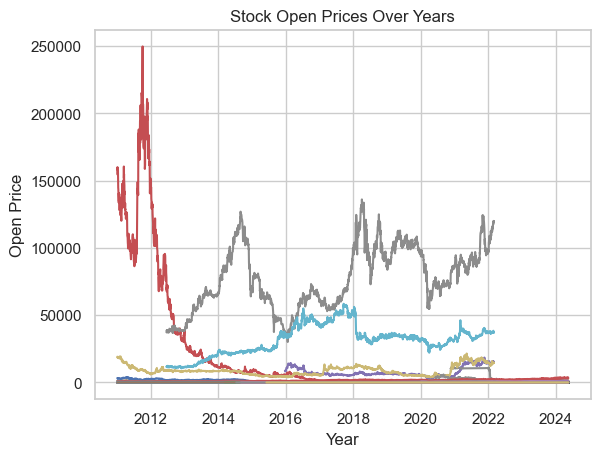

In [418]:
import matplotlib.pyplot as plt

for ticker in list(cleaned_historical_datas.keys()):
    plt.plot(cleaned_historical_datas[ticker]['open'])

# Add labels to the axes
plt.xlabel('Year')
plt.ylabel('Open Price')

# Add a title to the plot
plt.title('Stock Open Prices Over Years')

# Show the plot
plt.show()

Not really helpful, but what on earth is that red line that was trading at 250k in 2012?

In [420]:
max_name = ''
max_price = 0

for ticker in cleaned_historical_datas:
    ticker_max = cleaned_historical_datas[ticker]['open'].max()
    if ticker_max >= max_price:
        max_name = ticker
        max_price = ticker_max

print(f'max stock: {max_name} trading at {max_price}')

max stock: VIXY trading at 249840.0


Looks like it was VIXY (ProShares VIX Short-Term Futures ETF), a fund usually used to hedge against market downturns. 

Lets identify the top performing stocks and graph them over time

In [421]:

stock_rates_of_change = {}

for ticker, ticker_df in cleaned_historical_datas.items():
    init_price = ticker_df['open'].iloc[0]
    if init_price > 0:
        final_price = ticker_df['open'].iloc[-1]
        rate_of_change = (final_price - init_price) / init_price * 100
    else:
        rate_of_change = 0
    stock_rates_of_change[ticker] = rate_of_change
        

#Store top performers
top_stock_performers = sorted(stock_rates_of_change.items(), key=lambda x: x[1], reverse=True)

Lets graph the top 10 performers

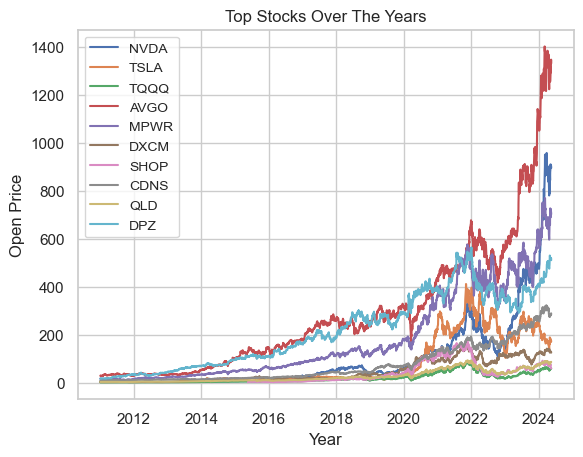

In [422]:
for ticker in top_stock_performers[:10]:
    plt.plot(cleaned_historical_datas[ticker[0]]['open'], label=ticker[0])

plt.xlabel('Year')
plt.ylabel('Open Price')

# Add a title to the plot
plt.title('Top Stocks Over The Years')
plt.legend(fontsize='small')  
# Show the plot
plt.show()

Before we see how the senator's trades performed, lets see the break down of the stock's sectos


In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import yfinance as yf

# sbux = yf.Ticker("GPRO")
# tlry = yf.Ticker("TLRY")

# 
# print(tlry.info['sector'])

industry_info = {}
for ticker in cleaned_historical_datas.keys():
    try:
        stock_ticker = yf.Ticker(ticker)
        stock_industry = stock_ticker.info['sector']
        if stock_industry in industry_info:
            industry_info[stock_industry] += 1
        else:
            industry_info[stock_industry] = 1
    except:
        print('no ticker found')
        # pass
            

        

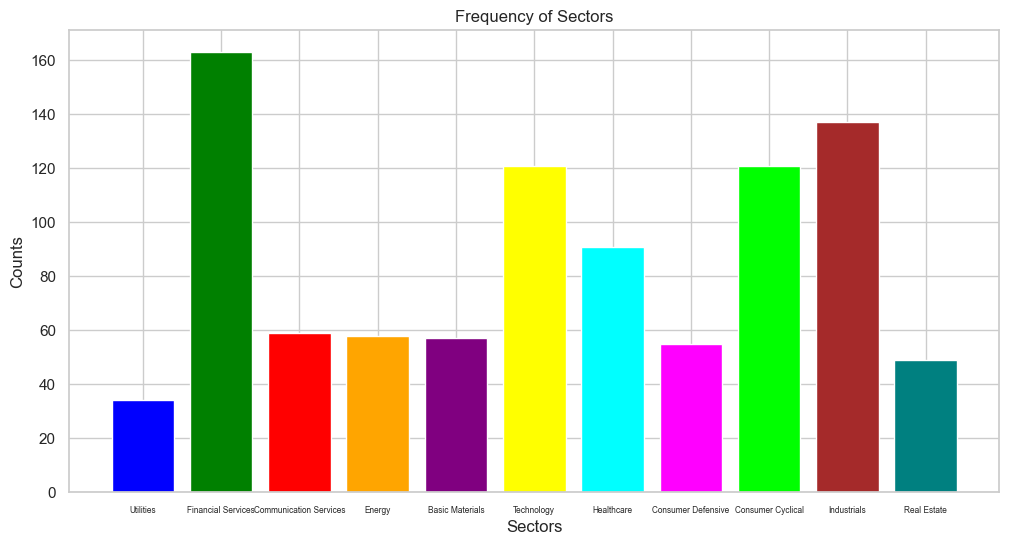

In [423]:
sectors = list(industry_info.keys())
counts = list(industry_info.values())
plt.figure(figsize=(12, 6))

colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'brown', 'teal']

plt.bar(sectors, counts, color=colors)

plt.xlabel('Sectors')
plt.ylabel('Counts')
plt.title('Frequency of Sectors')
plt.xticks(fontsize=6)  # Adjust font size here

# Displaying the plot
plt.show()

Looks like, Financial Services, Industrials, and Tech are the top sectors. Lets see a pie chart breakdown of the data.

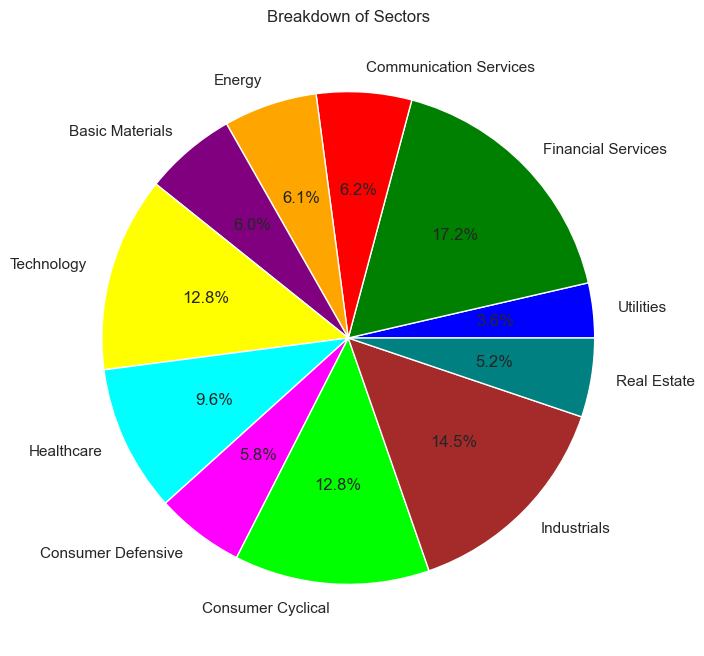

In [424]:
plt.figure(figsize=(8, 8))

# Creating the pie chart
plt.pie(counts, labels=sectors, autopct='%1.1f%%', colors=colors)

# Adding title
plt.title('Breakdown of Sectors')

# Displaying the plot
plt.show()

## Senator Performence
Now that we've seen a breakdown of the stocks the senators selected. Lets see how well each senator performed. In this section we'll loop through each stock each senator has bought and sold and compute their realized, unrealized, and total returns from their investments. We'll first begin by computing returns based on assets aqcuired before being in office, and while in office. For some stocks traded by the senators, their are only records of selling the asset and no records of buying it. This is likely because the asset was acquired before the senator took office, and didn't need to be reported. 

In [425]:
senator_name_list = senator_filing_data_df['Senator Name'].unique()
counter = 0

senator_stock_returns = {}


for senator in senator_name_list:
    #for each stock owned, pull transactions related to stock and sort in order of date
    senator_transactions = senator_filing_data_df[senator_filing_data_df['Senator Name'] == senator].sort_values(by='Transaction Date', ascending=True)

    senator_returns_list = []
    
    for stock in senator_transactions['Ticker'].unique():
        stock_data = cleaned_historical_datas[stock]
        total_shares = 0
        realized_gains = 0
        unrealized_gains = 0
        curr_stock_price = stock_data.iloc[-1]['open']
        cost = 0
        data_available = True

        stock_transactions = senator_transactions[senator_transactions['Ticker'] == stock]
        for index, transaction in stock_transactions.iterrows():
            action = transaction['Transaction Type']
            amount = transaction['Amount']
            date = transaction['Transaction Date']
            
            #Its possible the transaction date had NAN values and was dropped
            #We can find the closest date in the table to the given date, but its better to just skip
            if date in stock_data.index:
                share_price_at_trans_date = stock_data.loc[date, 'open']
            else:
                #uncomment to use closest existing date in table
                # date_diff = abs(stock_data.index - date)

                # # Find the index label (date) with the minimum absolute difference
                # closest_date = date_diff.argmin()
                # share_price_at_trans_date = stock_data.iloc[closest_date]['open']
                data_available = False
                break

            num_shares_transacted = (amount / share_price_at_trans_date)

            #if senator is purchasing, total_shares is increments
            #and realized_profit is decremented. If senatro is selling (partial or full),
            #total_shares are decremented or limited to 0 if sale makes total shares negative
            #This can happen if senator owned shares before being in office, and they are not accounted
            #for by our data. 


            if (action == 'Purchase'):
                total_shares += num_shares_transacted
                cost += amount
            else:
                if total_shares > 0:
                    total_shares = max(0, total_shares - num_shares_transacted)
                    realized_gains += amount
                else:
                    #in this case they are selling shares that 
                    #were acquired before being in office
                    #In this case, the realized return is 
                    #the amount
                    realized_gains += amount
        #After all transactions are accounted for, we calculate any unrealized
        #gains with shares leftover. We use the price increase from the first reported price
        # to today
        if data_available:
            realized_gains = realized_gains - cost
            #realized gains are subtracted from cost as they reduce the cost basis
            unrealized_gains = (curr_stock_price * total_shares) - (cost - realized_gains)
            trade_data = {'Ticker': stock, 'realized_returns': realized_gains,
                          'unrealized_returns': unrealized_gains, 'total_returns': realized_gains + unrealized_gains}      
            senator_returns_list.append(trade_data)

     #if no data is available, do nothing       
    if senator_returns_list:
        senator_returns_df = pd.DataFrame(senator_returns_list)
        senator_stock_returns[senator] = senator_returns_df
    



In [426]:
ranked_senator_returns = {}

for senator in senator_stock_returns:
    ranked_senator_returns[senator] = senator_stock_returns[senator]['total_returns'].sum()

sorted(ranked_senator_returns.items(), key=lambda x: x[1], reverse=True)[:10]
    

[('Hagerty, Bill', 10159539.997878281),
 ('Scott, Rick', 4245906.278602254),
 ('Smith, Tina', 3547645.747024471),
 ('Whitehouse, Sheldon', 2334432.3202192606),
 ('Perdue Jr, David A', 1984072.8550688042),
 ('Hickenlooper, John', 1287258.324317931),
 ('Shaheen, Jeanne', 828953.0),
 ('Cassidy, Bill', 555616.4191253986),
 ('King, Angus', 483095.2188692416),
 ('Flake, Jeffry L', 391834.94158487715)]

The returns are likely off by several hundreds of thousands, but that can be attributed to the assumptions made about 
trade size, preowned shares, and dropped values in the tables. Despite this, the ordering of this list, should still be somewhat accurate.
It would be difficult to find exact numbers, however the top 10 list here agrees somewhat with this list provided by [investopedia](https://www.investopedia.com/articles/investing/041516/who-are-americas-7richest-senators.asp)

Lets do the calculations one more time, but this time excluding any transactions involving stocks that were acquired before filing.

In [427]:
senator_name_list = senator_filing_data_df['Senator Name'].unique()
counter = 0

in_office_senator_stock_returns = {}


for senator in senator_name_list:
    #for each stock owned, pull transactions related to stock and sort in order of date
    senator_transactions = senator_filing_data_df[senator_filing_data_df['Senator Name'] == senator].sort_values(by='Transaction Date', ascending=True)

    senator_returns_list = []
    
    for stock in senator_transactions['Ticker'].unique():
        stock_data = cleaned_historical_datas[stock]
        total_shares = 0
        realized_gains = 0
        unrealized_gains = 0
        curr_stock_price = stock_data.iloc[-1]['open']
        cost = 0
        data_available = True

        stock_transactions = senator_transactions[senator_transactions['Ticker'] == stock]
        for index, transaction in stock_transactions.iterrows():
            action = transaction['Transaction Type']
            amount = transaction['Amount']
            date = transaction['Transaction Date']
            
            #Its possible the transaction date had NAN values and was dropped
            #We can find the closest date in the table to the given date, but its better to just skip
            if date in stock_data.index:
                share_price_at_trans_date = stock_data.loc[date, 'open']
            else:
                #uncomment to use closest existing date in table
                # date_diff = abs(stock_data.index - date)

                # # Find the index label (date) with the minimum absolute difference
                # closest_date = date_diff.argmin()
                # share_price_at_trans_date = stock_data.iloc[closest_date]['open']
                data_available = False
                break

            num_shares_transacted = (amount / share_price_at_trans_date)

            #if senator is purchasing, total_shares is increments
            #and realized_profit is decremented. If senatro is selling (partial or full),
            #total_shares are decremented or limited to 0 if sale makes total shares negative
            #This can happen if senator owned shares before being in office, and they are not accounted
            #for by our data. 

            if (action == 'Purchase'):
                total_shares += num_shares_transacted
                realized_gains -= amount
            else:
                #only compute sale if there are shares available
                if total_shares > 0:
                    total_shares = max(0, total_shares - num_shares_transacted)
                    realized_gains += amount
 
        #After all transactions are accounted for, we calculate any unrealized
        #gains with shares leftover. We use the price increase from the first reported price
        # to today

        if data_available:
            realized_gains = realized_gains - cost
            #realized gains are subtracted from cost as they reduce the cost basis
            unrealized_gains = (curr_stock_price * total_shares) - (cost - realized_gains)
            trade_data = {'Ticker': stock, 'realized_returns': realized_gains,
                          'unrealized_returns': unrealized_gains, 'total_returns': realized_gains + unrealized_gains}      
            senator_returns_list.append(trade_data)


    if (senator_returns_list):
        senator_returns_df = pd.DataFrame(senator_returns_list)
        in_office_senator_stock_returns[senator] = senator_returns_df
    

In [428]:
in_office_ranked_senator_returns = {}

for senator in in_office_senator_stock_returns:
    in_office_ranked_senator_returns[senator] = in_office_senator_stock_returns[senator]['total_returns'].sum()

top_10_in_office_senators = sorted(in_office_ranked_senator_returns.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_in_office_senators

[('Scott, Rick', 8016972.278602254),
 ('Warner, Mark', 6458592.406451105),
 ('Wyden, Ron', 5559363.8864063155),
 ('Perdue Jr, David A', 5183228.855068804),
 ('Whitehouse, Sheldon', 2050820.3202192606),
 ('Roberts, Pat', 1696191.2433072403),
 ('Daines, Steve', 1611797.5450072582),
 ('Portman, Robert J', 1245878.826348421),
 ('McCaskill, Claire', 1218727.2839903235),
 ('Warren, Elizabeth', 976069.7148818821)]

These are the trades made exclusively while the senator was in office

Lets see what this wealth distribution looks like

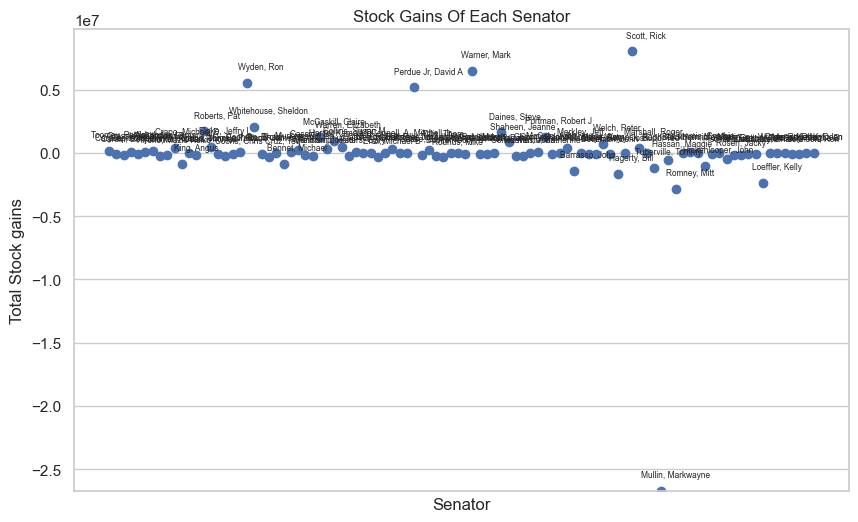

In [429]:
senators = [entry[0] for entry in in_office_ranked_senator_returns.items()]
total_gains = [entry[1] for entry in in_office_ranked_senator_returns.items()]
worst_gains = sorted(in_office_ranked_senator_returns.items(), key=lambda x: x[1], reverse=True)[-1]
# Set figure size (width, height) in inches
plt.figure(figsize=(10, 6))

# Creating the scatter plot
plt.scatter(senators, total_gains)
plt.ylim(worst_gains[1])

# Adding labels and title
plt.xlabel('Senator')
plt.ylabel('Total Stock gains')
plt.title('Stock Gains Of Each Senator')

# Rotating x-axis labels for better visibility
plt.xticks([])
for i, senator in enumerate(senators):
    plt.annotate(senator, (senators[i], total_gains[i]), textcoords="offset points", xytext=(10,10), ha='center', fontsize=6)



# Displaying the plot
plt.show()


Lets get a better view of the top 10

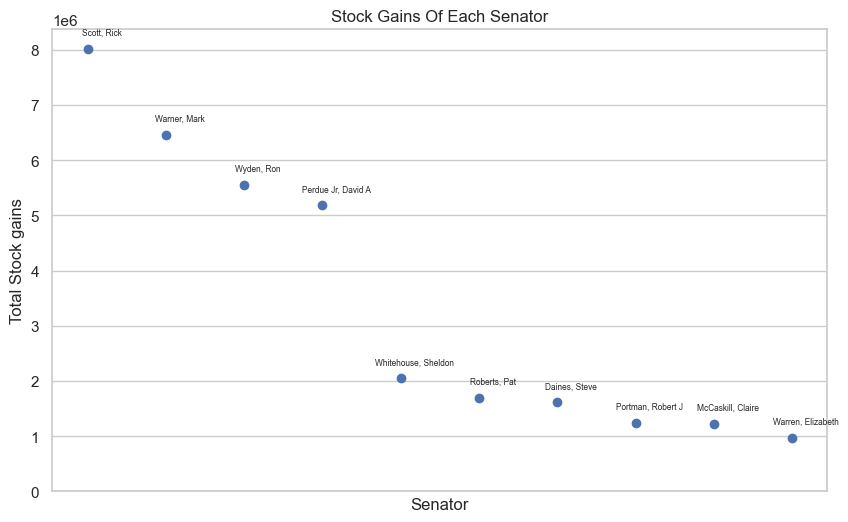

In [430]:
senators = [entry[0] for entry in top_10_in_office_senators]
total_gains = [entry[1] for entry in top_10_in_office_senators]
# Set figure size (width, height) in inches
plt.figure(figsize=(10, 6))

# Creating the scatter plot
plt.scatter(senators, total_gains)
plt.ylim(0)

# Adding labels and title
plt.xlabel('Senator')
plt.ylabel('Total Stock gains')
plt.title('Stock Gains Of Each Senator')

# Rotating x-axis labels for better visibility
plt.xticks([])
for i, senator in enumerate(senators):
    plt.annotate(senator, (senators[i], total_gains[i]), textcoords="offset points", xytext=(10,10), ha='center', fontsize=6)



# Displaying the plot
plt.show()

Looks like Florida Senator Rick Scott tops the charts with over 8 million dollars in gains while a senator. Scott is the founder of HCA, a healthcare group that made headlines for recieving a half a billion dollar fine for medicare fraud in the early 2000s [source](https://www.justice.gov/archive/opa/pr/2003/June/03_civ_386.htm#:~:text(formerly%20known%20as%20Columbia%2FHCA,the%20Justice%20Department%20announced%20today.)

Finally, lets make a box and whiskers plot to visualize the distribution of wealth. Lets use Seaborn for this

<Axes: xlabel='Total Returns'>

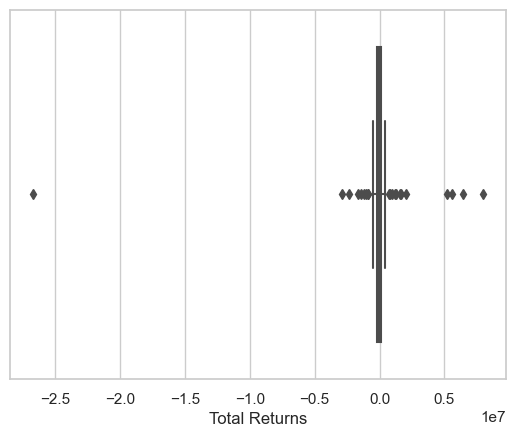

In [431]:
import seaborn as sns

sns.set(style='whitegrid')
senator_returns_df = pd.DataFrame(list(in_office_ranked_senator_returns.items()), columns=['Senator', 'Total Returns'])
sns.boxplot(x=senator_returns_df['Total Returns'])

I looks like a majority of the senators profited very little while in office compared to the outliers (Members of the top 10 senators).

## Analysis, hypothesis testing, & ML¶


Using the data we have collected, lets build a model that given a stock, will predict which senator is most likely to purchase that stock. To do this we will have to create a new data set from our existing data. First, lets create the following technical features:
* Daily price change
* weekly price change
* monthly price change
* yearly price change
* relative strenght index
* monthly volume change


In [432]:
def compute_price_changes(data, end_date):
    '''
    If a date doesnt exist, keep going back by one day until
    a date that does exist in the stock data is found
    '''
    
    # Filter data up to the end date
    data = data[data.index <= end_date]
    earliest_collected_date = data.index[0]
    
    # Compute daily change for the end date
    
    while end_date not in data.index:
        end_date = end_date - pd.Timedelta(days=1)  # Previous day

    end_date_close = data.loc[end_date, 'close']
    
    prev_date = end_date - pd.Timedelta(days=1)  
    while prev_date not in data.index:
        #check if we've passed the earliest available date
        if (prev_date < earliest_collected_date):
            prev_date = earliest_collected_date
        else:
            prev_date = prev_date - pd.Timedelta(days=1)  
        
    prev_date_close = data.loc[prev_date, 'close']
    daily_change = end_date_close - prev_date_close

    # Compute weekly change

    week_start_date = end_date - pd.Timedelta(days=6)  # 7 days ago
    while week_start_date not in data.index:
        #check if we've passed the earliest available date
        if (week_start_date < earliest_collected_date):
            week_start_date = earliest_collected_date
        else:
            week_start_date = week_start_date - pd.Timedelta(days=1) 

    week_start_close = data.loc[week_start_date, 'close']
    weekly_change = end_date_close - week_start_close

    # Compute monthly change
    month_start_date = end_date - pd.DateOffset(months=1)  # 1 month ago
    while month_start_date not in data.index:
        #check if we've passed the earliest available date
        if (month_start_date < earliest_collected_date):
            month_start_date = earliest_collected_date
        else:
            month_start_date = month_start_date - pd.Timedelta(days=1)  

    month_start_close = data.loc[month_start_date, 'close']
    monthly_change = end_date_close - month_start_close

    # Compute yearly change
    year_start_date = end_date - pd.DateOffset(years=1)  
    while year_start_date not in data.index:
        #check if we've passed the earliest available date
        if (year_start_date < earliest_collected_date):
            year_start_date = earliest_collected_date
        else:
            year_start_date = year_start_date - pd.Timedelta(days=1) 
        
    year_start_close = data.loc[year_start_date, 'close']
    yearly_change = end_date_close - year_start_close

    # Create DataFrame with the computed changes
    price_changes = (daily_change, weekly_change, monthly_change, yearly_change)

    return price_changes


#fix so if date doesnt exist, just go back

data = cleaned_historical_datas['DBP'].copy()
end_date = pd.to_datetime('2014-06-12')
price_changes = compute_price_changes(data, end_date)
print(price_changes)


(0.4799995422363281, 0.7700004577636719, -0.6499977111816406, -4.599998474121094)


In [433]:
def calculate_rsi(data, end_date):

    # Filter data for the 14 days before the end date
    start_date = end_date - pd.DateOffset(days=14)
    earliest_collected_date = data.index[0]

    while start_date not in data.index:
        if (start_date < earliest_collected_date):
            start_date = earliest_collected_date
        else:
            start_date = start_date - pd.DateOffset(days=1)
    
    data = data[(data.index >= start_date) & (data.index <= end_date)]
    # Calculate daily price changes
    delta = data['close'].diff()
    
    gain = (delta.where(delta > 0, 0)).mean()
    loss = (-delta.where(delta < 0, 0)).mean()

    #handle case where mean produces number close to 0
    #but should be zero
    if gain < 0.01:
        gain = 0

    if loss < 0.01:
        loss = 0

    #calculate relative strength (RS)
    #Prevents div by 0
    if loss == 0:
        rs = 0
    else:
        rs = gain / loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi
    
data = cleaned_historical_datas['COV'].copy()
end_date = pd.to_datetime('2014-01-08')
rsi = calculate_rsi(data, end_date)
print(rsi)

0.0


[Source](https://seekingalpha.com/article/4518407-rsi-indicator-meaning-and-calculation) for Rsi calculation

In [434]:
def compute_month_vol_change(data, end_date):
    # Get the start and end dates of the month containing the given date
    
    start_date = end_date - pd.DateOffset(months=1)
    earliest_collected_date = data.index[0]
    while start_date not in data.index:
        if (start_date < earliest_collected_date):
            start_date = earliest_collected_date
        else:
            start_date = start_date - pd.DateOffset(days=1)

    
    # Filter the data to include only the month of interest
    monthly_data = data[(data.index >= start_date) & (data.index <= end_date)]
    # Calculate the total volume at the start and end of the month
    start_volume = monthly_data.iloc[0]['volume']
    end_volume = monthly_data.iloc[-1]['volume']

    # Calculate the percentage change in volume
    if start_volume == 0:  
        monthly_volume_change = 0
    else:
        monthly_volume_change = (end_volume - start_volume) / start_volume * 100

    return monthly_volume_change

data = cleaned_historical_datas['GLD'].copy()
end_date = pd.to_datetime('2014-04-14')
vol = compute_month_vol_change(data, end_date)
print(vol)

-44.07350329994305


Now that we've defined our functions to compute these features, lets compute them. Lets build a new table that contains these new features.
We'll start by making a copy of senator_filing_data_df and dropping all rows where the transaction type is not "purchase". Next, we'll compute our new features for each transactions.

In [ ]:
Daily price change
weekly price change
monthly price change
yearly price change
relative strenght index
monthly volume change

In [440]:
senator_stock_feature_data = senator_filing_data_df.copy()
#get only purchase trades
senator_stock_feature_data = senator_stock_feature_data[senator_stock_feature_data['Transaction Type'] == 'Purchase']

price_features = []
rsi_data = []
mont_vol_data = []

for i, trade in senator_stock_feature_data.iterrows():
    price_data = compute_price_changes(cleaned_historical_datas[trade['Ticker']], trade['Transaction Date'])
    rsi = calculate_rsi(cleaned_historical_datas[trade['Ticker']], trade['Transaction Date'])
    month_vol_change = compute_month_vol_change(cleaned_historical_datas[trade['Ticker']], trade['Transaction Date'])
    price_features.append(price_data)
    rsi_data.append(rsi)
    mont_vol_data.append(month_vol_change)
    



daily_delta, week_delta, month_delta, year_delta = zip(*price_features)

senator_stock_feature_data['daily_delta'] = daily_delta
senator_stock_feature_data['week_delta'] = week_delta
senator_stock_feature_data['month_delta'] = month_delta
senator_stock_feature_data['year_delta'] = year_delta
senator_stock_feature_data['rsi'] = rsi_data
senator_stock_feature_data['month_vol_delta'] = mont_vol_data



In [454]:
model_stock_feature_data = senator_stock_feature_data.copy()
model_stock_feature_data.head()

Transaction Date  Owner Ticker                            Asset Name  Amount       Senator Name Transaction Type  daily_delta  week_delta  month_delta    year_delta        rsi  month_vol_delta
5        2014-06-12  Joint    DBP        PowerShares DB Precious Metals   15001  Toomey, Patrick J         Purchase     0.480000    0.770000    -0.649998     -4.599998  68.085141       150.000000
6        2014-06-12  Joint   VIXY  ProShares VIX Short-Term Futures ETF   15001  Toomey, Patrick J         Purchase   392.000000  548.000000 -1264.000000 -14252.000000  40.848214       119.057239
8        2014-06-24  Joint   AMLP                  ALPS Alerian MLP ETF   15001  Toomey, Patrick J         Purchase     0.299995    1.949997     2.799995      8.049995  63.366334       -29.377252
12       2014-09-02  Joint    IXP     iShares Global Telecom (NYSEArca)   15001  Toomey, Patrick J         Purchase     0.019997    0.379997     0.860001      4.200001  82.966990       -89.420530
13       2014-09-02  Joint    SDY      SPDR S&P Dividend ETF (NYSEArca)   15001  Toomey, Patrick J         Purchase    -0.079994    0.120003     3.100006      9.959999  73.077375         1.452145

Here are some other cool technical indicators to [try](https://www.investopedia.com/top-7-technical-analysis-tools-4773275)

Lets Build Our Model

lets standardize the columns daily_delta,	week_delta,	month_delta, year_delta, month_vol_delta to make it easier for the model to learn

In [609]:
cols_to_stand = ['daily_delta', 'week_delta', 'month_delta', 'year_delta', 'month_vol_delta']

for col in cols_to_stand:
    mean = model_stock_feature_data[col].mean()
    std = model_stock_feature_data[col].std()
    model_stock_feature_data[col] = (model_stock_feature_data[col] - mean) / std
model_stock_feature_data['rsi'] = model_stock_feature_data['rsi'] / 100

Lets also use one-hot encoding to replace the senators name

In [613]:
one_hot_encoded = pd.get_dummies(model_stock_feature_data['Senator Name'], prefix='Senator')

model_stock_feature_data = pd.concat([model_stock_feature_data, one_hot_encoded], axis=1)
model_stock_feature_data.head()

Transaction Date  Owner Ticker                            Asset Name  Amount       Senator Name Transaction Type  daily_delta  week_delta  month_delta  ...  Senator_Toomey, Patrick J  Senator_Tuberville, Tommy  Senator_Udall, Thomas  Senator_Warner, Mark  Senator_Warnock, Raphael  Senator_Warren, Elizabeth  Senator_Welch, Peter  Senator_Whitehouse, Sheldon  Senator_Wicker, Roger  Senator_Wyden, Ron
5        2014-06-12  Joint    DBP        PowerShares DB Precious Metals   15001  Toomey, Patrick J         Purchase     0.110755    0.131040    -0.001915  ...                       True                      False                  False                 False                     False                      False                 False                        False                  False               False
6        2014-06-12  Joint   VIXY  ProShares VIX Short-Term Futures ETF   15001  Toomey, Patrick J         Purchase    73.220471   67.177423   -67.539886  ...                       True                      False                  False                 False                     False                      False                 False                        False                  False               False
8        2014-06-24  Joint   AMLP                  ALPS Alerian MLP ETF   15001  Toomey, Patrick J         Purchase     0.077142    0.275613     0.182520  ...                       True                      False                  False                 False                     False                      False                 False                        False                  False               False
12       2014-09-02  Joint    IXP     iShares Global Telecom (NYSEArca)   15001  Toomey, Patrick J         Purchase     0.024857    0.083257     0.078809  ...                       True                      False                  False                 False                     False                      False                 False                        False                  False               False
13       2014-09-02  Joint    SDY      SPDR S&P Dividend ETF (NYSEArca)   15001  Toomey, Patrick J         Purchase     0.006185    0.051403     0.198558  ...                       True                      False                  False                 False                     False                      False                 False                        False                  False               False

[5 rows x 595 columns]

Below we'll use pytorch to build a multiclass classifier. We'll create a train, validation, and test set to feed into our model. Our model will have three layers, an input layer, a hidden layer, and an output layer. The features will go from the input dimension, to 128 dimesnions, to 64, to the output dimension. We will also use batch normalization to speed up training, as well as dropout to reduce overfitting. [Here](https://pytorch.org/tutorials/beginner/basics/intro.html) is a good resource for using pytorch. This tutorial is provided by Pytorch and will get you up to speed on things like tensors, DataSets, DataLoaders, and various neural network components.

And [here](https://machinelearningmastery.com/building-a-multiclass-classification-model-in-pytorch/) is another good resource for multiclass classification with pytorch

In [630]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score





# Split the data into features and target variable
X = model_stock_feature_data[['daily_delta', 'week_delta', 'month_delta', 'year_delta', 'rsi', 'month_vol_delta']]
y = model_stock_feature_data.drop(['Amount', 'daily_delta', 'week_delta', 'month_delta', 'year_delta', 'rsi',
             'month_vol_delta', 'Transaction Date', 'Owner', 'Ticker', "Asset Name", "Amount", "Senator Name", 'Transaction Type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#create validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


class SenatorDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define datasets and data loaders
train_dataset = SenatorDataset(X_train, y_train)
val_dataset = SenatorDataset(X_val, y_val)
test_dataset = SenatorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


class SenatorClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(SenatorClassifier, self).__init__()

        self.layer_1 = nn.Linear(input_size, 128)
        self.layer_2 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, output_size) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(64)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        x = self.softmax(x)
        
        return x

In [631]:
input_size = len(X.columns) 
output_size = 97  

model = SenatorClassifier(input_size, output_size)

num_epochs = 100
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
eval_every = 2
eval_epochs = []
training_loss_values = []
val_loss_values = []

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        y_pred = model(inputs)        
        loss = loss_fn(y_pred, torch.argmax(labels, dim=1))
        loss.backward()
        optimizer.step()


    # Validation loop
    if epoch > 0 and epoch % eval_every == 0:

        model.eval()

        # don't calculate gradients when evaluating your model
        with torch.no_grad():
            for inputs, labels in val_loader:
                y_pred = model(inputs)
                #get the max class prediciton
                _, predicted = torch.max(y_pred, 1)
                val_loss = loss_fn(y_pred, torch.argmax(labels, dim=1))


        print(f"Epoch: {epoch}, Train Loss: {loss.item()} Eval Loss: {val_loss.item()}")
            
        eval_epochs.append(epoch)
        training_loss_values.append(loss.item())
        val_loss_values.append(val_loss.item())



# Step 6: Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        _, labels_idx = torch.max(labels, 1)
        correct += (predicted == labels_idx).sum().item()

print('Accuracy of the network on the test set: %d %%' % (100 * correct / total))

Epoch: 2, Train Loss: 4.5781731605529785 Eval Loss: 4.575579643249512
Epoch: 4, Train Loss: 4.5196213722229 Eval Loss: 4.567601203918457
Epoch: 6, Train Loss: 4.58509635925293 Eval Loss: 4.558582305908203
Epoch: 8, Train Loss: 4.581508636474609 Eval Loss: 4.552462100982666
Epoch: 10, Train Loss: 4.576669216156006 Eval Loss: 4.530623912811279
Epoch: 12, Train Loss: 4.503026962280273 Eval Loss: 4.524925231933594
Epoch: 14, Train Loss: 4.577270030975342 Eval Loss: 4.52385139465332
Epoch: 16, Train Loss: 4.58901834487915 Eval Loss: 4.5243730545043945
Epoch: 18, Train Loss: 4.590254306793213 Eval Loss: 4.525300979614258
Epoch: 20, Train Loss: 4.587310314178467 Eval Loss: 4.522820472717285
Epoch: 22, Train Loss: 4.590610027313232 Eval Loss: 4.51900577545166
Epoch: 24, Train Loss: 4.145995616912842 Eval Loss: 4.518892288208008
Epoch: 26, Train Loss: 4.528542995452881 Eval Loss: 4.516449451446533
Epoch: 28, Train Loss: 4.258970737457275 Eval Loss: 4.516263008117676
Epoch: 30, Train Loss: 4.591

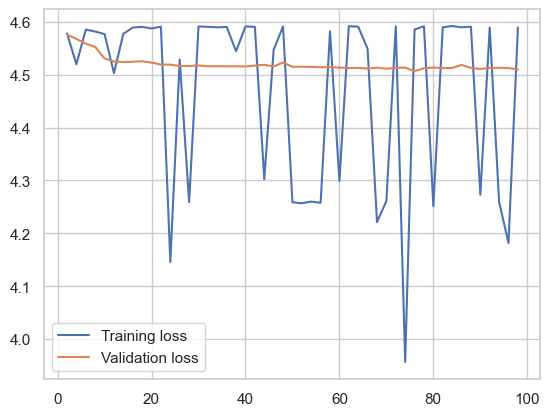

In [632]:
# Plot the training and validation loss
plt.plot(eval_epochs, training_loss_values, label='Training loss')
plt.plot(eval_epochs, val_loss_values, label='Validation loss')
plt.legend()
plt.show()

This model really stinks. This is likely because there are a significant number of classes and its difficult to distinguish between the output classes from the input data. Lets see if we can build a binary classifier to distinguish between the top 10 senators and the rest of the senators.

In [623]:
binary_class_data = senator_stock_feature_data.copy()
top_10 = [name for (name, ret) in top_10_in_office_senators]
binary_class_data['Top_10'] = binary_class_data['Senator Name'].isin(top_10).astype(int)

cols_to_stand = ['daily_delta', 'week_delta', 'month_delta', 'year_delta', 'month_vol_delta', 'rsi']

for col in cols_to_stand:
    mean = binary_class_data[col].mean()
    std = binary_class_data[col].std()
    binary_class_data[col] = (binary_class_data[col] - mean) / std
binary_class_data['rsi'] = binary_class_data['rsi'] / 100

In [627]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Split the data into features and target variable
X = binary_class_data[['daily_delta', 'week_delta', 'month_delta', 'year_delta', 'rsi', 'month_vol_delta']]
y = binary_class_data['Top_10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6843702579666161
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1804
           1       0.50      0.00      0.01       832

    accuracy                           0.68      2636
   macro avg       0.59      0.50      0.41      2636
weighted avg       0.63      0.68      0.56      2636



At a quick glance, the 68% accuracy looks promising for a classification model as it predicts the right class better than 1/2 the time. However, analyzing the classification report reveals how truly terrible this model is. The precision, which measures true positive over all positives is 50% for the top 10 class. This means that out of all the predictions for the top 10 class, only half were right. Additionally, the top 10 class has a recall of 0, meaning the model could not identify any senators in the top 10. This is all reflected in the f1 score of 0.01, inidicating the poor precision and recall. 

While we cant build a model to help us predict which senator is most likely to pick a stock, or classify trades into those made by senators in the top 10 or not, we can identify what a normal trade looks like and find the outliers. 

### Things to Try
One major limitation for this project was the lack of quality stock data. By choosing Yahoo Finance as the source of our stock data (yahoo-fin scrapes Yahoo Finance), we opted for speed and cost or quality. This proved to be one of several limiting factors when it came to producing a model. If money is no a restriction, I recommend using an api such as alphavantage that provides quality stock data (including technical information) for better results. 

## Insight:

In this tutorial we went from a website containging thousands of reports each containing hundreds of lines of raw information, to well cleaned and manicured data ready to be analzed and experiemented with. 
While we werent able to prove any senators gains were illgotten through insider trading, this exercise in  machine learning (and cynisim) did prove just how much money our elected officials are making while in office.